# Proyecto_5

### Diseñar experimento

#### Formulando Hipótesis

En la hipótesis nula, el usuario tiene más facilidad para comprar en la página original.

La hipótesis alternativa indica que el usuario tiene mayor o menor facilidad para comprar en la página editada.

$$H_0: p = p_0$$
$$H_1: p \ne p_0$$



**Grupo de control**: Página original

**Grupo de Tratamiento**: Página con cambios





**Cambios realizados:**
    
    - Estrechar banner
    
    - Llenar Home de categorías para facilitar la busqueda de productos
    
    - Botón de busqueda

### Instalar librerías

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
plt.rcParams['figure.figsize']=(15, 8)

from scipy.stats import bernoulli, beta 

from bayes import *

### Obtener y preparar datos

In [2]:
data=pd.read_excel('../data/Datos_recopilados.xlsx')
data.head()

,userid,version,page,compra_exp1,click_banner_exp2,time_userid,time_exp3,genero,edad,profesion
0,cu1,control,old_page,0,1,47,0,M,25,Data Analyst
1,cu2,control,old_page,0,0,55,0,F,32,Profesor
2,cu3,control,old_page,1,0,31,1,M,25,Nutricionista
3,cu4,control,old_page,1,0,48,0,M,41,Desarrollador Web
4,cu5,control,old_page,0,0,26,1,F,38,Diseñadore


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   userid             30 non-null     object
 1   version            30 non-null     object
 2   page               30 non-null     object
 3   compra_exp1        30 non-null     int64 
 4   click_banner_exp2  30 non-null     int64 
 5   time_userid        30 non-null     int64 
 6   time_exp3          30 non-null     int64 
 7   genero             30 non-null     object
 8   edad               30 non-null     int64 
 9   profesion          30 non-null     object
dtypes: int64(5), object(5)
memory usage: 2.5+ KB


In [4]:
pd.crosstab(data.version, data.page)

page,new_page,old_page
version,,
control,0,15
tratamiento,15,0


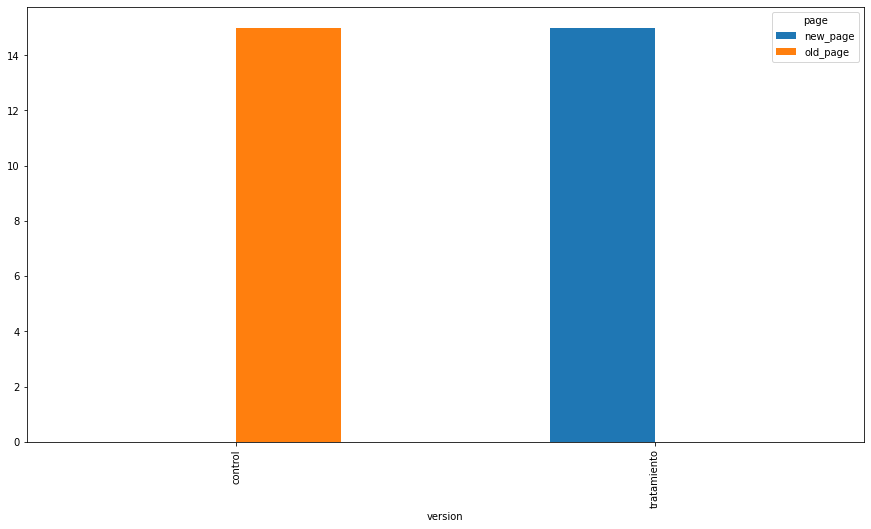

In [5]:
pd.crosstab(data.version, data.page).plot(kind='bar');

### 1er Experimento

In [6]:
imps_ctrl = len(data[data['version']=='control'])
convs_ctrl = data[data['version']=='control'].compra_exp1.value_counts()[1]
imps_test=len(data[data['version']=='tratamiento'])
convs_test= data[data['version']=='tratamiento'].compra_exp1.value_counts()[1]

CR_ctrl = convs_ctrl/imps_ctrl
CR_test = convs_test/imps_test

f'TASAS: Control={CR_ctrl}, Test={CR_test}'

'TASAS: Control=0.4, Test=0.8'

In [7]:
# a prioris, las betas

a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
a_T, b_T = convs_test+1, imps_test-convs_test+1

beta_control=beta(a_C, b_C)
beta_test=beta(a_T, b_T)

In [8]:
beta_control.mean(), beta_test.mean()

(0.4117647058823529, 0.7647058823529411)

In [9]:
x=np.linspace(0, 1, 100)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

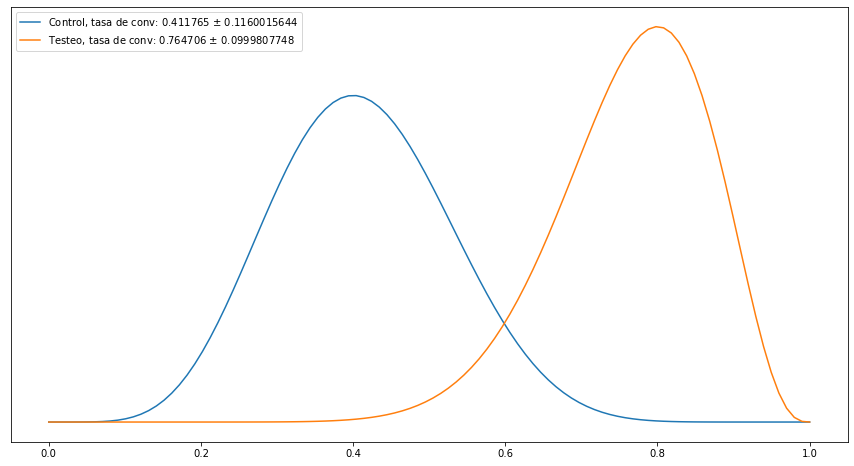

In [10]:
plot([beta_control, beta_test], ['Control', 'Testeo'])

In [11]:
salto=(beta_test.mean() - beta_control.mean())/beta_control.mean()

salto

0.8571428571428571

In [12]:
#prob=calc_prob(beta_test, beta_control)
#prob

In [13]:
from mpmath import betainc   # integral de beta

prob=betainc(a_T, b_T, 0.6, 1, regularized=True)

prob=float(prob)

prob

0.934853258248192

In [14]:
'''El test aumenta la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'''.format(salto*100, prob*100)

'El test aumenta la tasa de conversion en un 85.71%, con una probabilidad del 93.49%'

### 2do Experimento 

In [15]:
imps_ctrl = len(data[data['version']=='control'])
convs_ctrl = data[data['version']=='control'].click_banner_exp2.value_counts()[1]
imps_test=len(data[data['version']=='tratamiento'])
convs_test= data[data['version']=='tratamiento'].click_banner_exp2.value_counts()[1]

CR_ctrl = convs_ctrl/imps_ctrl
CR_test = convs_test/imps_test

f'TASAS: Control={CR_ctrl}, Test={CR_test}'

'TASAS: Control=0.3333333333333333, Test=0.2'

In [16]:
# a prioris, las betas

a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
a_T, b_T = convs_test+1, imps_test-convs_test+1

beta_control=beta(a_C, b_C)
beta_test=beta(a_T, b_T)

In [17]:
beta_control.mean(), beta_test.mean()

(0.35294117647058826, 0.23529411764705882)

In [18]:
x=np.linspace(0, 1, 100)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

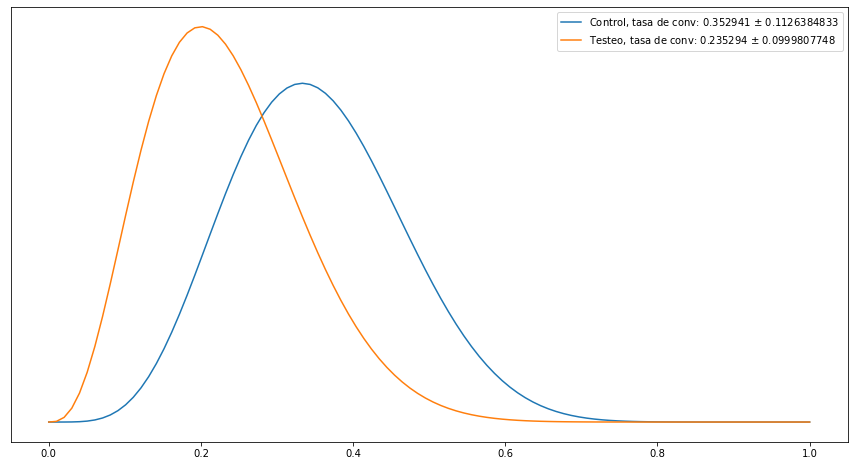

In [19]:
plot([beta_control, beta_test], ['Control', 'Testeo'])

In [20]:
salto=(beta_test.mean() - beta_control.mean())/beta_control.mean()

salto

-0.33333333333333337

In [21]:
#prob=calc_prob(beta_test, beta_control)

In [22]:
from mpmath import betainc   # integral de beta

prob=betainc(a_T, b_T, 0.27, 1, regularized=True)

prob=float(prob)

prob

0.33603615029030176

In [23]:
'''El test disminuye la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'''.format(salto*100, prob*100)

'El test disminuye la tasa de conversion en un -33.33%, con una probabilidad del 33.60%'

### 3er Experimento 

In [24]:
imps_ctrl = len(data[data['version']=='control'])
convs_ctrl = data[data['version']=='control'].time_exp3.value_counts()[1]
imps_test=len(data[data['version']=='tratamiento'])
convs_test= data[data['version']=='tratamiento'].time_exp3.value_counts()[1]

CR_ctrl = convs_ctrl/imps_ctrl
CR_test = convs_test/imps_test

f'TASAS: Control={CR_ctrl}, Test={CR_test}'

'TASAS: Control=0.4666666666666667, Test=0.5333333333333333'

In [25]:
# a prioris, las betas

a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
a_T, b_T = convs_test+1, imps_test-convs_test+1

beta_control=beta(a_C, b_C)
beta_test=beta(a_T, b_T)

In [26]:
beta_control.mean(), beta_test.mean()

(0.47058823529411764, 0.5294117647058824)

In [27]:
x=np.linspace(0, 1, 100)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

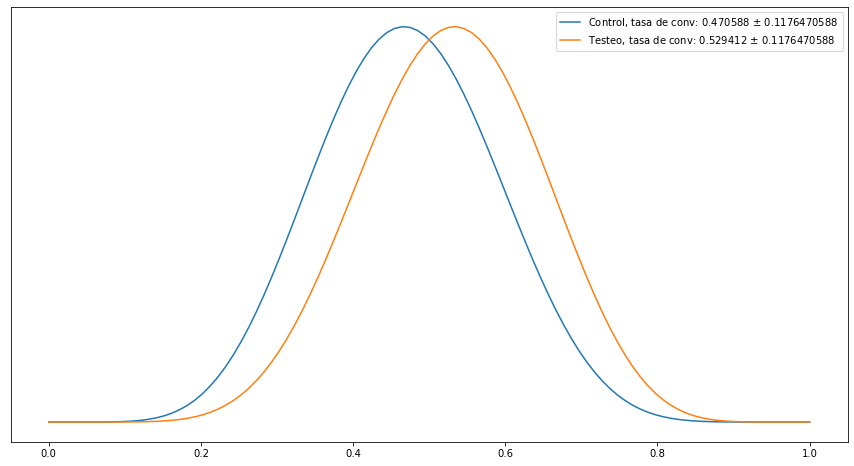

In [28]:
plot([beta_control, beta_test], ['Control', 'Testeo'])

In [29]:
salto=(beta_test.mean() - beta_control.mean())/beta_control.mean()

salto

0.12500000000000003

In [30]:
#prob=calc_prob(beta_test, beta_control)

In [31]:
from mpmath import betainc   # integral de beta

prob=betainc(a_T, b_T, 0.5, 1, regularized=True)

prob=float(prob)

prob

0.5981903076171875

In [32]:
'''El test aumenta la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'''.format(salto*100, prob*100)

'El test aumenta la tasa de conversion en un 12.50%, con una probabilidad del 59.82%'